# Image Preprocessing For VGG16

### The goal of this notebook is to open and convert images into something that a neural net can use.

For a more streamlined workflow, check out the `PN_image_urls_to_VGG16.ipynb` file. The end of that file is this notebook. It was included separately in case anyone would just want to use the preprocessing straight to VGG16. 

In [16]:
import numpy as np
import pandas as pd
from skimage import io
import skimage
import cv2

In [15]:
!pip install opencv-python

In [6]:
# Code to open test images
# Probably gonna change in the aws pipeline 

# grabbed random test URLs
image_urls = ['https://ap.rdcpix.com/d7b0b0ef57213b43da91b2f1acc779f2l-m1215733027s.jpg',
'https://ap.rdcpix.com/d7b0b0ef57213b43da91b2f1acc779f2l-m740444322s.jpg',
'https://ap.rdcpix.com/d7b0b0ef57213b43da91b2f1acc779f2l-m1487098145s.jpg',
'https://ap.rdcpix.com/d7b0b0ef57213b43da91b2f1acc779f2l-m4013322748s.jpg',
'https://ap.rdcpix.com/d7b0b0ef57213b43da91b2f1acc779f2l-m619539816s.jpg',
'https://ap.rdcpix.com/d7b0b0ef57213b43da91b2f1acc779f2l-m4113411394s.jpg',
'https://ap.rdcpix.com/d7b0b0ef57213b43da91b2f1acc779f2l-m2374890169s.jpg',
'https://ap.rdcpix.com/d7b0b0ef57213b43da91b2f1acc779f2l-m1032856648s.jpg',
'https://ap.rdcpix.com/d7b0b0ef57213b43da91b2f1acc779f2l-m1119855744s.jpg',
'https://ap.rdcpix.com/d7b0b0ef57213b43da91b2f1acc779f2l-m2336063171s.jpg',
'https://ap.rdcpix.com/d7b0b0ef57213b43da91b2f1acc779f2l-m384973453s.jpg',
]


# From preprocessing_ST

image_pixels = np.array([io.imread(x) for x in image_urls])
image_pixels.shape

(11, 80, 120, 3)

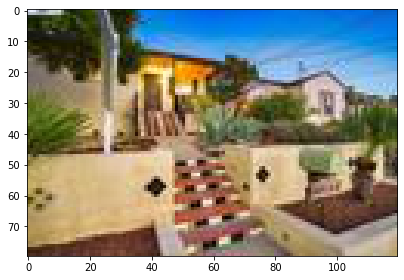

In [7]:
# Showing image
im1 = image_pixels[0]
io.imshow(im1)

In [22]:


IMG_SIZE = 25

def convert(image):
    # Converts data to be constant size/shape/color
    
    image = skimage.color.rgb2gray(image)
    return cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    
    


In [23]:
converted = np.asarray([convert(i) for i in image_pixels])

In [24]:
# converted images are of dimensions (num_images, grayscale_x, grayscale_y)
# where num_images --> number of images in dataset
# grayscale_x, grayscale_y --> 2d grid where postion indicates the pixel position
#                              and the number in that position is grayscale integer 
#                              from 0 to 255. 
converted.shape

(11, 25, 25)

In [27]:
# Normalizing data to be in range [0,1] as opposed to [0,255]
converted = converted / 255
converted

array([[[3.97552858e-08, 4.33388844e-08, 2.33061859e-08, ...,
         2.24549769e-08, 2.08660987e-08, 2.11903886e-08],
        [7.76179085e-09, 1.49488324e-08, 1.28332388e-08, ...,
         2.30939172e-08, 2.36296731e-08, 2.36116396e-08],
        [5.58596263e-09, 1.64651664e-08, 8.74159393e-09, ...,
         2.71110881e-08, 2.63772562e-08, 2.50229751e-08],
        ...,
        [3.60982031e-08, 3.65368716e-08, 4.01813102e-08, ...,
         3.55329162e-08, 3.32092117e-08, 4.03393141e-08],
        [3.35419214e-08, 3.79030749e-08, 3.68819847e-08, ...,
         3.87898778e-08, 4.49244633e-08, 4.21182595e-08],
        [9.50907540e-09, 1.27103220e-08, 1.28282285e-08, ...,
         4.57695161e-08, 4.18310220e-08, 3.94805767e-08]],

       [[4.59929326e-08, 4.45892488e-08, 2.90588711e-08, ...,
         2.40234943e-08, 2.28401428e-08, 2.10903210e-08],
        [2.42276480e-08, 2.69310077e-08, 2.79093082e-08, ...,
         2.49758090e-08, 2.39640028e-08, 2.37730078e-08],
        [2.85677046e-08, 

In [28]:
# Putting it all into a function 
# writing the file to a python function to be more easily accessed
# %writefile preprocess_image.py

##### THIS FUNCTION IS NOT ENTIRELY CORRECT I FIXED IT IN THE PN_IMAGE_URLS_TO_VGG16 NOTEBOOK
def preprocess_image(image_urls, IMG_SIZE = 25):
    # Given a list of urls, reads them into pixels, converts them to grayscale, 
    # standardizes the size and shape to be put into nn
    
    # converted images are of dimensions (num_images, grayscale_x, grayscale_y)
    # where num_images --> number of images in image_urls
    # grayscale_x, grayscale_y --> 2d grid where postion indicates the pixel position
    #                              and the number in that position is the standardized 
    #                              grayscale integer from 0 to 1
    
    # The IMG_SIZE constant is the length of a side in the square that is the 
    # converted image
    # ie the converted size of the images is 25X25 pixels using the default
    # value above
    
    # 
    
    
    
    
    

    def convert(image):
        # Converts data to be constant size/shape/color

        image = skimage.color.rgb2gray(image)
        return cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    
    converted = np.asarray([convert(i) for i in image_pixels])
    
    # Normalizing data to be in range [0,1] as opposed to [0,255]
    converted = converted / 255
    
    return converted
    

In [30]:
preprocess_image(image_urls).shape

(11, 25, 25)